In [1]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('combined_data_1.txt', names = ['Cust_Id', 'Rating'], usecols = [0,1])
df['Rating'] = df['Rating'].astype(float)
print(df.shape)

(24058263, 2)


In [7]:
p = df.groupby('Rating')['Rating'].agg(['count'])

In [9]:
print(p)
# get movie count
movie_count = df.isnull().sum()[1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count

          count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583


In [20]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


Rating    4499
dtype: int64

In [21]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

In [22]:
df_nan.shape

(4499, 2)

In [23]:
df.shape

(24058263, 2)

In [24]:
df_clean = df[pd.notnull(df['Rating'])]

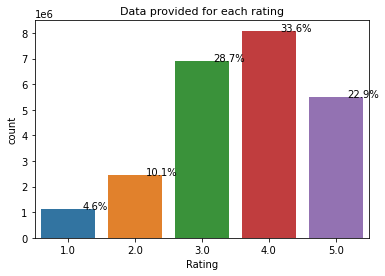

In [33]:
df_clean.shape
ax = sns.countplot(x="Rating", data=df_clean)
plt.title('Data provided for each rating', fontsize=11)
total = float(len(df_clean))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
f = ['count','mean']

df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)